In [ ]:
# Importing necessary libraries
import pandas as pd
import csv

In [ ]:
# Reading the cleveland dataset
df = pd.read_csv("/content/cleveland_data.csv", header=None,sep=',',names=["age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"])

In [ ]:
#Naming the columns with the features
split_data = df["age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"].str.split(",")
data = split_data.to_list()

new_df = pd.DataFrame(data, columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
#Size of the dataset
new_df.shape

(302, 14)

In [ ]:
#Converting the fetures to float datatype
new_df['age'] = new_df['age'].astype(float)
new_df['sex'] = new_df['sex'].astype(float)
new_df['cp'] = new_df['cp'].astype(float)
new_df['trestbps'] = new_df['trestbps'].astype(float)
new_df['chol'] = new_df['chol'].astype(float)
new_df['fbs'] = new_df['fbs'].astype(float)
new_df['restecg'] = new_df['restecg'].astype(float)
new_df['thalach'] = new_df['thalach'].astype(float)
new_df['exang'] = new_df['exang'].astype(float)
new_df['oldpeak'] = new_df['oldpeak'].astype(float)
new_df['slope'] = new_df['slope'].astype(float)

new_df['num'] = new_df['num'].astype(float)

In [ ]:
#Replacing missing values with 0.0 in column 'ca'
new_df['ca'] = new_df['ca'].replace('?',0.0)

In [ ]:
new_df['ca']

0      3.0
1      2.0
2      0.0
3      0.0
4      0.0
      ... 
297    0.0
298    2.0
299    1.0
300    1.0
301    0.0
Name: ca, Length: 302, dtype: object

In [ ]:
#Replacing missing values in column 'thal'
new_df['thal'] = new_df['thal'].replace('?',0.0)

In [ ]:
new_df['ca'] = new_df['ca'].astype(float)
new_df['thal'] = new_df['thal'].astype(float)

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    float64
 1   sex       302 non-null    float64
 2   cp        302 non-null    float64
 3   trestbps  302 non-null    float64
 4   chol      302 non-null    float64
 5   fbs       302 non-null    float64
 6   restecg   302 non-null    float64
 7   thalach   302 non-null    float64
 8   exang     302 non-null    float64
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    float64
 11  ca        302 non-null    float64
 12  thal      302 non-null    float64
 13  num       302 non-null    float64
dtypes: float64(14)
memory usage: 33.2 KB


Initially we drop thal and thalach attributes as we feel that theses features are not important for prediction purposes

In [ ]:
new_df = new_df.drop('thal',axis=1)
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,0.0


In [ ]:
new_df = new_df.drop('thalach',axis=1)
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,2.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,0.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,0.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,0.0,0.8,1.0,0.0,0.0


In [ ]:
#Assigning input and output columns for train_test_split evaluation
x = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [ ]:
y.shape

(302,)

In [ ]:
#Reshaping y values as it does not contain columns
y = y.reshape((-1,1))

In [ ]:
# Calculating the mean and variance of input values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)# Fitting and transforming the x values with the mean and variance

In [ ]:
# Splitting te dataset into train and test dataset.
#20% of dataset is used for testing purpose
#The random_state parameter is used for initializing the internal random number generator, which will decide the splitting of data into train and test indices
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,
                                                 random_state = 2022)

# **Support Vector Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  62.295081967213115
Confusion Matrix: 


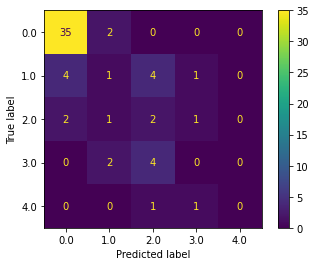

In [ ]:
# Support Vector Classifier model
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

#Evaluation of model

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

# **Principal Component Analysis (PCA)**

Principal Component Analysis is an unsupervised learning algorithm that is used for the dimensionality reduction in machine learning. It is a statistical process that converts the observations of correlated features into a set of linearly uncorrelated features with the help of orthogonal transformation. These new transformed features are called the Principal Components.

PCA generally tries to find the lower-dimensional surface to project the high-dimensional data.

PCA works by considering the variance of each attribute because the high attribute shows the good split between the classes, and hence it reduces the dimensionality.

In [ ]:
from sklearn.decomposition import PCA 
pca = PCA(n_components = 2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
print(pca.explained_variance_ratio_)

[0.64704564 0.35295436]


SVC model used after pca dimensionality reduction

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  67.21311475409836
F1-score: 67.21311475409836
Confusion Matrix: 


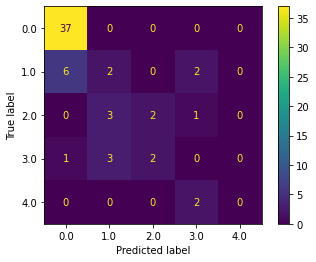

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F1-score:",f1_score(y_test,y_pred,average='micro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

# **Heat Map**

A heat map is a two-dimensional representation of data in which values are represented by colors. Correlation Heat map is a two dimensional plot of the amount of correlation (measure of dependence) between variables represented by colors. The varying intensity of color represents the measure of correlation. Correlation is a measure of linear relationship between two variables. 

Correlation between two variables can also be determined using scatter plot between these two variables. When there are multiple variables, and we want to find the correlation between all of them, a matrix data structure called correlation matrix is used. Correlation values ranges from -1 to +1.

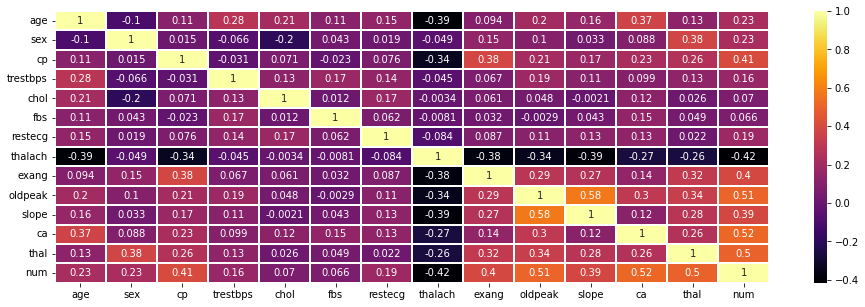

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sb.heatmap(new_df.corr(),annot = True,linewidths=1,cmap='inferno')

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,
                                                 random_state = 2022)

# **Linear Discriminant Analysis(LDA)**

Linear discriminant analysis is supervised machine learning, the technique used to find a linear combination of features that separates two or more classes of objects or events. 

Linear discriminant analysis, also known as LDA,  does the separation by computing the directions (“linear discriminants”) that represent the axis that enhances the separation between multiple classes. 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 
ld = LDA(n_components = 2)
x_train = ld.fit_transform(x_train,y_train)
x_test = ld.transform(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  70.49180327868852
F1-score: 70.49180327868852
Confusion Matrix: 


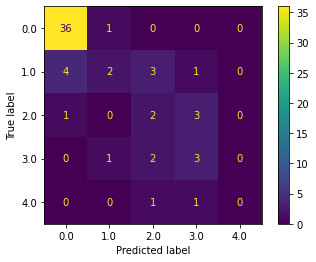

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F1-score:",f1_score(y_test,y_pred,average='micro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

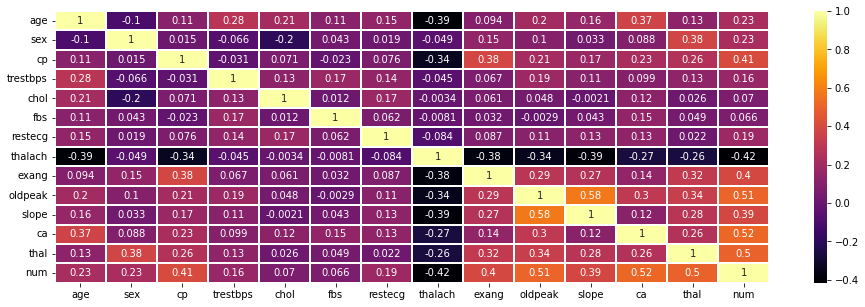

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize = (16,5))
sb.heatmap(new_df.corr(),annot = True,linewidths=1,cmap="inferno")

# **KNeighbors Classifier**

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  63.934426229508205
F1-score: 63.934426229508205
Confusion Matrix: 


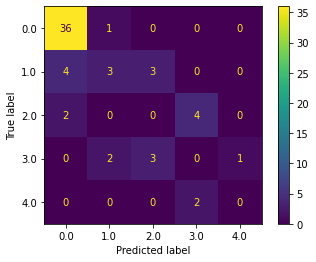

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=10, weights="uniform")
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F1-score:",f1_score(y_test,y_pred,average='micro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

# **GridSearchCV**
We pass predefined values for hyperparameters to the GridSearchCV function in the form of dictionary.

GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.

In [ ]:
#Hypertuning of parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[5,6,7,8,9,10],'weights':['uniform','distance']}]
grid_model = GridSearchCV(estimator=knn_model,param_grid=parameters,scoring='accuracy',cv=10)
grid_result = grid_model.fit(x_train,y_train)
grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'n_neighbors': 6, 'weights': 'uniform'}

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2022)

# **Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier()
decision_classifier.fit(x_train,y_train)
y_pred = decision_classifier.predict(x_test)

Accuracy score: 59.01639344262295
F1 score: 59.01639344262295


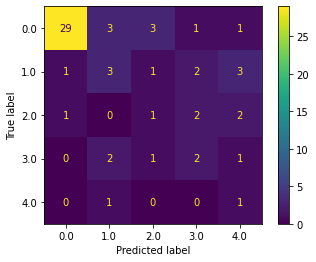

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)

print("F1 score:",f1_score(y_test,y_pred,average='micro')*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

**Prediciton using a new input**

In [ ]:
import numpy as np
input_data = (	67.0,	1.0	,4.0,	160.0	,286.0,	0.0,	2.0,	1.0,	1.5,	2.0,	3.0)
newdata = np.asarray(input_data)
newdata2 = newdata.reshape((1,-1))

prediction = decision_classifier.predict(newdata2)
print(prediction)

[2.]


# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier()
random_classifier.fit(x_train,y_train)
y_pred = random_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Accuracy score: 60.65573770491803


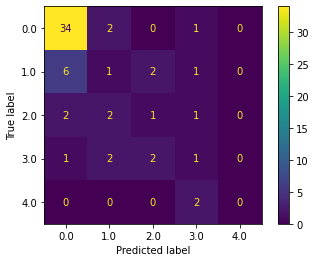

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
import numpy as np
input_data = (	67.0,	1.0	,4.0,	160.0	,286.0,	0.0,	2.0,	1.0,	1.5,	2.0,	3.0)
newdata = np.asarray(input_data)
newdata2 = newdata.reshape((1,-1))

prediction = random_classifier.predict(newdata2)
print(prediction)

[2.]


Accuracy:  67.21311475409836
F-Measure:  35.60902255639098
Confusion Matrix: 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


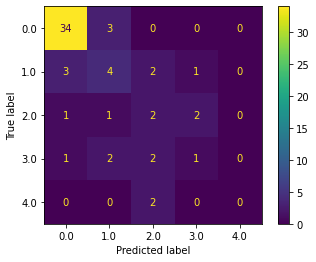

In [ ]:
from sklearn.naive_bayes import BernoulliNB
nb_classifier = BernoulliNB()
nb_classifier.fit(x_train,y_train)
y_pred = nb_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F-Measure: ",f1_score(y_test,y_pred,average='macro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

**Based on PCA and LDA, we remove 'thalach' feature**

In [ ]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0


In [ ]:
new_df = new_df.drop('thalach',axis=1)
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,0.0,0.8,1.0,0.0,3.0,0.0


In [ ]:
x = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [ ]:
print(x.shape)
print(y.shape)

(302, 12)
(302,)


In [ ]:
y = y.reshape((-1,1))
y.shape

(302, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=2022)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(241, 12)
(61, 12)
(241, 1)
(61, 1)


In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy Score: 60.65573770491803


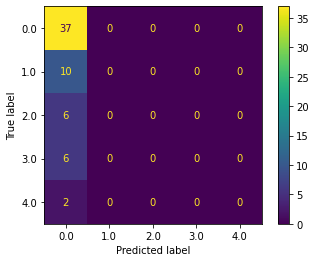

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

# **Backward Elimination Method**

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv("/content/cleveland_data.csv", header=None,sep=',',names=["age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"])

In [ ]:
split_data = df["age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num"].str.split(",")
data = split_data.to_list()

new_df = pd.DataFrame(data, columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [ ]:
new_df['age'] = new_df['age'].astype(float)
new_df['sex'] = new_df['sex'].astype(float)
new_df['cp'] = new_df['cp'].astype(float)
new_df['trestbps'] = new_df['trestbps'].astype(float)
new_df['chol'] = new_df['chol'].astype(float)
new_df['fbs'] = new_df['fbs'].astype(float)
new_df['restecg'] = new_df['restecg'].astype(float)
new_df['thalach'] = new_df['thalach'].astype(float)
new_df['exang'] = new_df['exang'].astype(float)
new_df['oldpeak'] = new_df['oldpeak'].astype(float)
new_df['slope'] = new_df['slope'].astype(float)

new_df['num'] = new_df['num'].astype(float)

In [ ]:
new_df['ca'] = new_df['ca'].replace('?',0.0)

In [ ]:
new_df['thal'] = new_df['thal'].replace('?',0.0)

In [ ]:
new_df['ca'] = new_df['ca'].astype(float)
new_df['thal'] = new_df['thal'].astype(float)

In [ ]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0


In [ ]:
import numpy as np
x = np.array(new_df.iloc[:,0:13])

In [ ]:
x

array([[67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       [37.,  1.,  3., ...,  3.,  0.,  3.],
       ...,
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.],
       [38.,  1.,  3., ...,  1.,  0.,  3.]])

In [ ]:
y = np.array(new_df.iloc[:,-1])

In [ ]:
y

array([2., 1., 0., 0., 0., 3., 0., 2., 1., 0., 0., 2., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 3., 4., 0., 0., 0., 0., 3., 0., 2., 1., 0., 0.,
       0., 3., 1., 3., 0., 4., 0., 0., 0., 1., 4., 0., 4., 0., 0., 0., 0.,
       2., 0., 1., 1., 1., 1., 0., 0., 2., 0., 1., 0., 2., 2., 1., 0., 2.,
       1., 0., 3., 1., 1., 1., 0., 1., 0., 0., 3., 0., 0., 0., 3., 0., 0.,
       0., 0., 0., 0., 0., 3., 0., 0., 0., 1., 2., 3., 0., 0., 0., 0., 0.,
       0., 3., 0., 2., 1., 2., 3., 1., 1., 0., 2., 2., 0., 0., 0., 3., 2.,
       3., 4., 0., 3., 1., 0., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 0., 0., 1., 0., 1., 0., 1., 4., 0., 0., 0., 0., 0., 0., 4.,
       3., 1., 1., 1., 2., 0., 0., 4., 0., 0., 0., 0., 0., 0., 1., 0., 3.,
       0., 1., 0., 4., 1., 0., 1., 0., 0., 3., 2., 0., 0., 1., 0., 0., 2.,
       1., 2., 0., 3., 1., 2., 0., 3., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       3., 3., 3., 0., 1., 0., 4., 0., 3., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 3., 1., 0., 0.

In [ ]:
print(x.shape)
print(y.shape)

(302, 13)
(302,)


In [ ]:
y = y.reshape((-1,1))

In [ ]:
print(x.shape)
print(y.shape)

(302, 13)
(302, 1)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2022)


In [ ]:
print("Shape of Training Input",x_train.shape)
print("Shape of Training Output",y_train.shape)

print("Shape of Testing Input",x_test.shape)
print("Shape of Testing Output",y_test.shape)

Shape of Training Input (241, 13)
Shape of Training Output (241, 1)
Shape of Testing Input (61, 13)
Shape of Testing Output (61, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()

mlr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred = mlr.predict(x_test)

In [ ]:
for i in range(0,len(y_pred)):
    print("Actual: ",y_test[i]," and Predict: ",y_pred[i])

Actual:  [0.]  and Predict:  [0.12937679]
Actual:  [0.]  and Predict:  [-0.01199022]
Actual:  [0.]  and Predict:  [0.57454387]
Actual:  [0.]  and Predict:  [1.4377665]
Actual:  [1.]  and Predict:  [1.82300488]
Actual:  [2.]  and Predict:  [2.08398146]
Actual:  [0.]  and Predict:  [0.9520512]
Actual:  [3.]  and Predict:  [2.83532492]
Actual:  [0.]  and Predict:  [0.92688324]
Actual:  [3.]  and Predict:  [1.55262682]
Actual:  [0.]  and Predict:  [0.42679441]
Actual:  [0.]  and Predict:  [-0.23875531]
Actual:  [0.]  and Predict:  [0.64944851]
Actual:  [0.]  and Predict:  [0.4281482]
Actual:  [1.]  and Predict:  [2.40374889]
Actual:  [4.]  and Predict:  [1.88066395]
Actual:  [0.]  and Predict:  [0.61854486]
Actual:  [0.]  and Predict:  [0.97695412]
Actual:  [0.]  and Predict:  [-0.00497295]
Actual:  [0.]  and Predict:  [0.6524531]
Actual:  [0.]  and Predict:  [0.00985461]
Actual:  [0.]  and Predict:  [-0.23922671]
Actual:  [1.]  and Predict:  [2.29371219]
Actual:  [3.]  and Predict:  [1.81

In [ ]:
mlr.score(x,y)

0.5633728753191856

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
x

array([[67.,  1.,  4., ...,  2.,  3.,  3.],
       [67.,  1.,  4., ...,  2.,  2.,  7.],
       [37.,  1.,  3., ...,  3.,  0.,  3.],
       ...,
       [57.,  1.,  4., ...,  2.,  1.,  7.],
       [57.,  0.,  2., ...,  2.,  1.,  3.],
       [38.,  1.,  3., ...,  1.,  0.,  3.]])

In [ ]:
np.ones((302,1)).astype(int)

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
    

In [ ]:
x_for_statsmodel = np.append(arr = np.ones((302,1)).astype(int),values = x,axis = 1)

In [ ]:
from statsmodels.regression.linear_model import OLS

In [ ]:
model = OLS(endog = y,exog = x_for_statsmodel)

In [ ]:
model = model.fit()

In [ ]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     28.90
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           8.02e-45
Time:                        09:18:34   Log-Likelihood:                -364.31
No. Observations:                 302   AIC:                             756.6
Df Residuals:                     288   BIC:                             808.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7321      0.753     -0.972      0.3

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,3,4,6,7,8,9,10,11,12,13]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     31.42
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           1.41e-45
Time:                        09:18:42   Log-Likelihood:                -364.32
No. Observations:                 302   AIC:                             754.6
Df Residuals:                     289   BIC:                             802.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7129      0.741     -0.963      0.3

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,3,4,6,7,8,9,10,11,12]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     34.38
Date:                Thu, 24 Feb 2022   Prob (F-statistic):           2.39e-46
Time:                        09:18:48   Log-Likelihood:                -364.35
No. Observations:                 302   AIC:                             752.7
Df Residuals:                     290   BIC:                             797.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6970      0.735     -0.948      0.3

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[1,2,3,4,5,6,7,8,9,10,11]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.726
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              69.99
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    4.94e-75
Time:                        09:18:53   Log-Likelihood:                         -364.81
No. Observations:                 302   AIC:                                      751.6
Df Residuals:                     291   BIC:                                      792.4
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,3,5,6,7,8,9,10]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.722
Model:                            OLS   Adj. R-squared (uncentered):              0.712
Method:                 Least Squares   F-statistic:                              75.81
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    3.92e-75
Time:                        09:19:48   Log-Likelihood:                         -366.87
No. Observations:                 302   AIC:                                      753.7
Df Residuals:                     292   BIC:                                      790.8
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,4,5,6,7,8,9]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.720
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              83.73
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    1.10e-75
Time:                        09:20:51   Log-Likelihood:                         -367.89
No. Observations:                 302   AIC:                                      753.8
Df Residuals:                     293   BIC:                                      787.2
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[1,2,3,4,5,6,7,8]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.718
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              93.70
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    2.73e-76
Time:                        09:21:31   Log-Likelihood:                         -368.84
No. Observations:                 302   AIC:                                      753.7
Df Residuals:                     294   BIC:                                      783.4
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
x_for_statsmodel = x_for_statsmodel[:,[0,1,2,3,4,6,7]]
model = OLS(endog = y,exog = x_for_statsmodel)
model = model.fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.716
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              106.3
Date:                Thu, 24 Feb 2022   Prob (F-statistic):                    8.16e-77
Time:                        09:21:59   Log-Likelihood:                         -370.04
No. Observations:                 302   AIC:                                      754.1
Df Residuals:                     295   BIC:                                      780.1
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
new_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0


In [ ]:
x = new_df.iloc[:,[0,1,2,3,6,7,8,9,10,11,12]].values
y = new_df.iloc[:,-1].values

In [ ]:
y.shape

(302,)

In [ ]:
y = y.reshape((-1,1))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,
                                                 random_state = 2022)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  65.57377049180327
Confusion Matrix: 


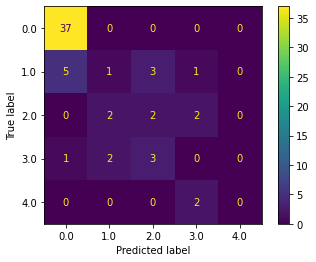

In [ ]:
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(x_train,y_train)
y_pred = svc_classifier.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy:  59.01639344262295
F1-score: 59.01639344262295
Confusion Matrix: 


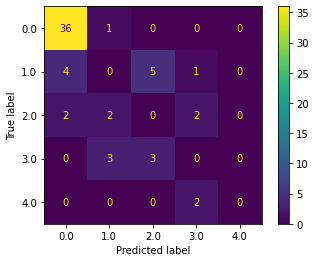

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=6, weights="uniform")
knn_model.fit(x_train,y_train)
y_pred = knn_model.predict(x_test)

from sklearn.metrics import accuracy_score 
print("Accuracy: ",accuracy_score(y_test,y_pred)*100)

from sklearn.metrics import f1_score
print("F1-score:",f1_score(y_test,y_pred,average='micro')*100)

print("Confusion Matrix: ")
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors':[2,3,4,5,6,7,8,9,10,11,12],'weights':['uniform','distance']}]
grid_model = GridSearchCV(estimator=knn_model,param_grid=parameters,scoring='accuracy',cv=10)
grid_result = grid_model.fit(x_train,y_train)
grid_result.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

{'n_neighbors': 6, 'weights': 'uniform'}